In [1]:
### Loads in modules for this script 

from datetime import datetime as dt
from concurrent import futures
import pandas as pd
from pandas import DataFrame
### Loads in the yahoo finance fix
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
import os



In [2]:
os.getcwd()

'D:\\UTD\\sem 3\\python\\Midterm'

In [3]:
os.chdir('D:\\UTD\\sem 3\\python\\Midterm\\stock-time-series')

In [4]:
import csv
import glob
import os
import numpy as np

# Answer 1

For this question I first saved all the files given in the zip file into one folder,It can be seen as below.

In [5]:
for filename in os.listdir(os.getcwd()):
    print(filename)

AABA_2006-01-01_to_2018-01-01.csv
AAPL_2006-01-01_to_2018-01-01.csv
all_stocks_2006-01-01_to_2018-01-01.csv
all_stocks_2017-01-01_to_2018-01-01.csv
AMZN_2006-01-01_to_2018-01-01.csv
AXP_2006-01-01_to_2018-01-01.csv
BA_2006-01-01_to_2018-01-01.csv
CAT_2006-01-01_to_2018-01-01.csv
CSCO_2006-01-01_to_2018-01-01.csv
CVX_2006-01-01_to_2018-01-01.csv
DIS_2006-01-01_to_2018-01-01.csv
GE_2006-01-01_to_2018-01-01.csv
GOOGL_2006-01-01_to_2018-01-01.csv
GS_2006-01-01_to_2018-01-01.csv
HD_2006-01-01_to_2018-01-01.csv
IBM_2006-01-01_to_2018-01-01.csv
INTC_2006-01-01_to_2018-01-01.csv
JNJ_2006-01-01_to_2018-01-01.csv
JPM_2006-01-01_to_2018-01-01.csv
KO_2006-01-01_to_2018-01-01.csv
MCD_2006-01-01_to_2018-01-01.csv
MMM_2006-01-01_to_2018-01-01.csv
MRK_2006-01-01_to_2018-01-01.csv
MSFT_2006-01-01_to_2018-01-01.csv
NKE_2006-01-01_to_2018-01-01.csv
PFE_2006-01-01_to_2018-01-01.csv
PG_2006-01-01_to_2018-01-01.csv
TRV_2006-01-01_to_2018-01-01.csv
UNH_2006-01-01_to_2018-01-01.csv
UTX_2006-01-01_to_2018-01-0

__Explanation:__

First of all I split the all csv files into one list variable called temp and then saved all the Ticker Symbols as a elements in list named x and then also created another list called z for future use.
Then I created another variable called ticker that contained all the data about every single stock, and created a new dictionary with ticker symbols as key and stock data as value
After that using the execute function created every ticker symbol as a pandas dataframe with index as a datetime.

In [6]:
x=[]
temp=[]
ticker=[]
y=''
dict = {}

#creates two list with elements as Ticker symbol
for filename in os.listdir(os.getcwd()):
        temp=filename.split('_')                        #-->spliting the data with _ and saving them in split
        x.append(temp[0])                               #-->creates a list with Ticker symbol as elements 
        z=x.copy()                                      #-->copies values of x into z                                                                                    
#changing the same element names
z[2]='all2017'
z[3]='all2018'
for filename,i in zip(os.listdir(os.getcwd()),range(len(x))):
    y=x.pop(0)                                          #-->popping the values of x one by one and storing in y
    y=pd.read_csv(filename)                             #-->making  y pandas dataframe
    ticker.append(y)                                    #-->appending stock data into ticker one by one
    dict[z[i]] = ticker[i]                              #-->making a dictionary with z as key and ticker as value
for j,k in dict.items():
    k.Date=pd.to_datetime(k.Date)                       #-->changing the values of date into date time
    exec("%s=k.set_index('Date')" %(j))                 #-->making every Ticker Symbol as Ticker variable with the values as
                                                        #  pandas dataframe


# Answer 2

__Report:__

For the given data first of all I am going to use all2017,all2018 data frames as created above to do the analysis as it contains all the data for all the stocks given in file.For That I will merge these two dataset into one and make new dataframe that will contain all the data for all the stocks,if I find any null values in data I am going to fill it with moving average as it can give the best possible explanation for the given data. Then Use python info() and describe() functions to get an idea about minimum,maximum,standard deviation, mean for every stock.I am only going to use Close and Volume column for analysis as other columns does not give us the proper analysis for every day stock prices.

I am going to create 4 different time periods for analyis as starting(from staring to 2007),recession(from 2008 upto 2010),after recession(from 2011 to 2016) and current(from 2017 to current).then I will use matplot lib function to create the garphs for all the time periods and get results about all the stocks for values of Close and Volume. I am also going to create a bar chart for every stock to show which stock had the maximum number of transactions during that period.

In [7]:
import matplotlib.pyplot as plt

frames=[all2017,all2018]
total=pd.concat(frames)
total.fillna(lambda x: np.round(x.rolling(window=50).mean()),inplace=True)
print(total.info())
print(total.groupby('Name').describe().stack())






<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101393 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      101393 non-null object
High      101393 non-null object
Low       101393 non-null object
Close     101393 non-null float64
Volume    101393 non-null int64
Name      101393 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.4+ MB
None
                  Close        Volume
Name                                 
AABA count  3270.000000  3.270000e+03
     mean     30.568034  2.078725e+07
     std      15.030953  1.963562e+07
     min       8.950000  1.939061e+06
     25%      16.392500  1.146256e+07
     50%      28.175000  1.667745e+07
     75%      39.630000  2.447513e+07
     max      72.930000  4.382317e+08
AAPL count  3270.000000  3.270000e+03
     mean     71.255529  1.231621e+08
     std      48.687516  1.017579e+08
     min       7.240000  1.147592e+07
     25%      24.650000  4.418491e+07
     50%      64.715000  9.774961e+07
 

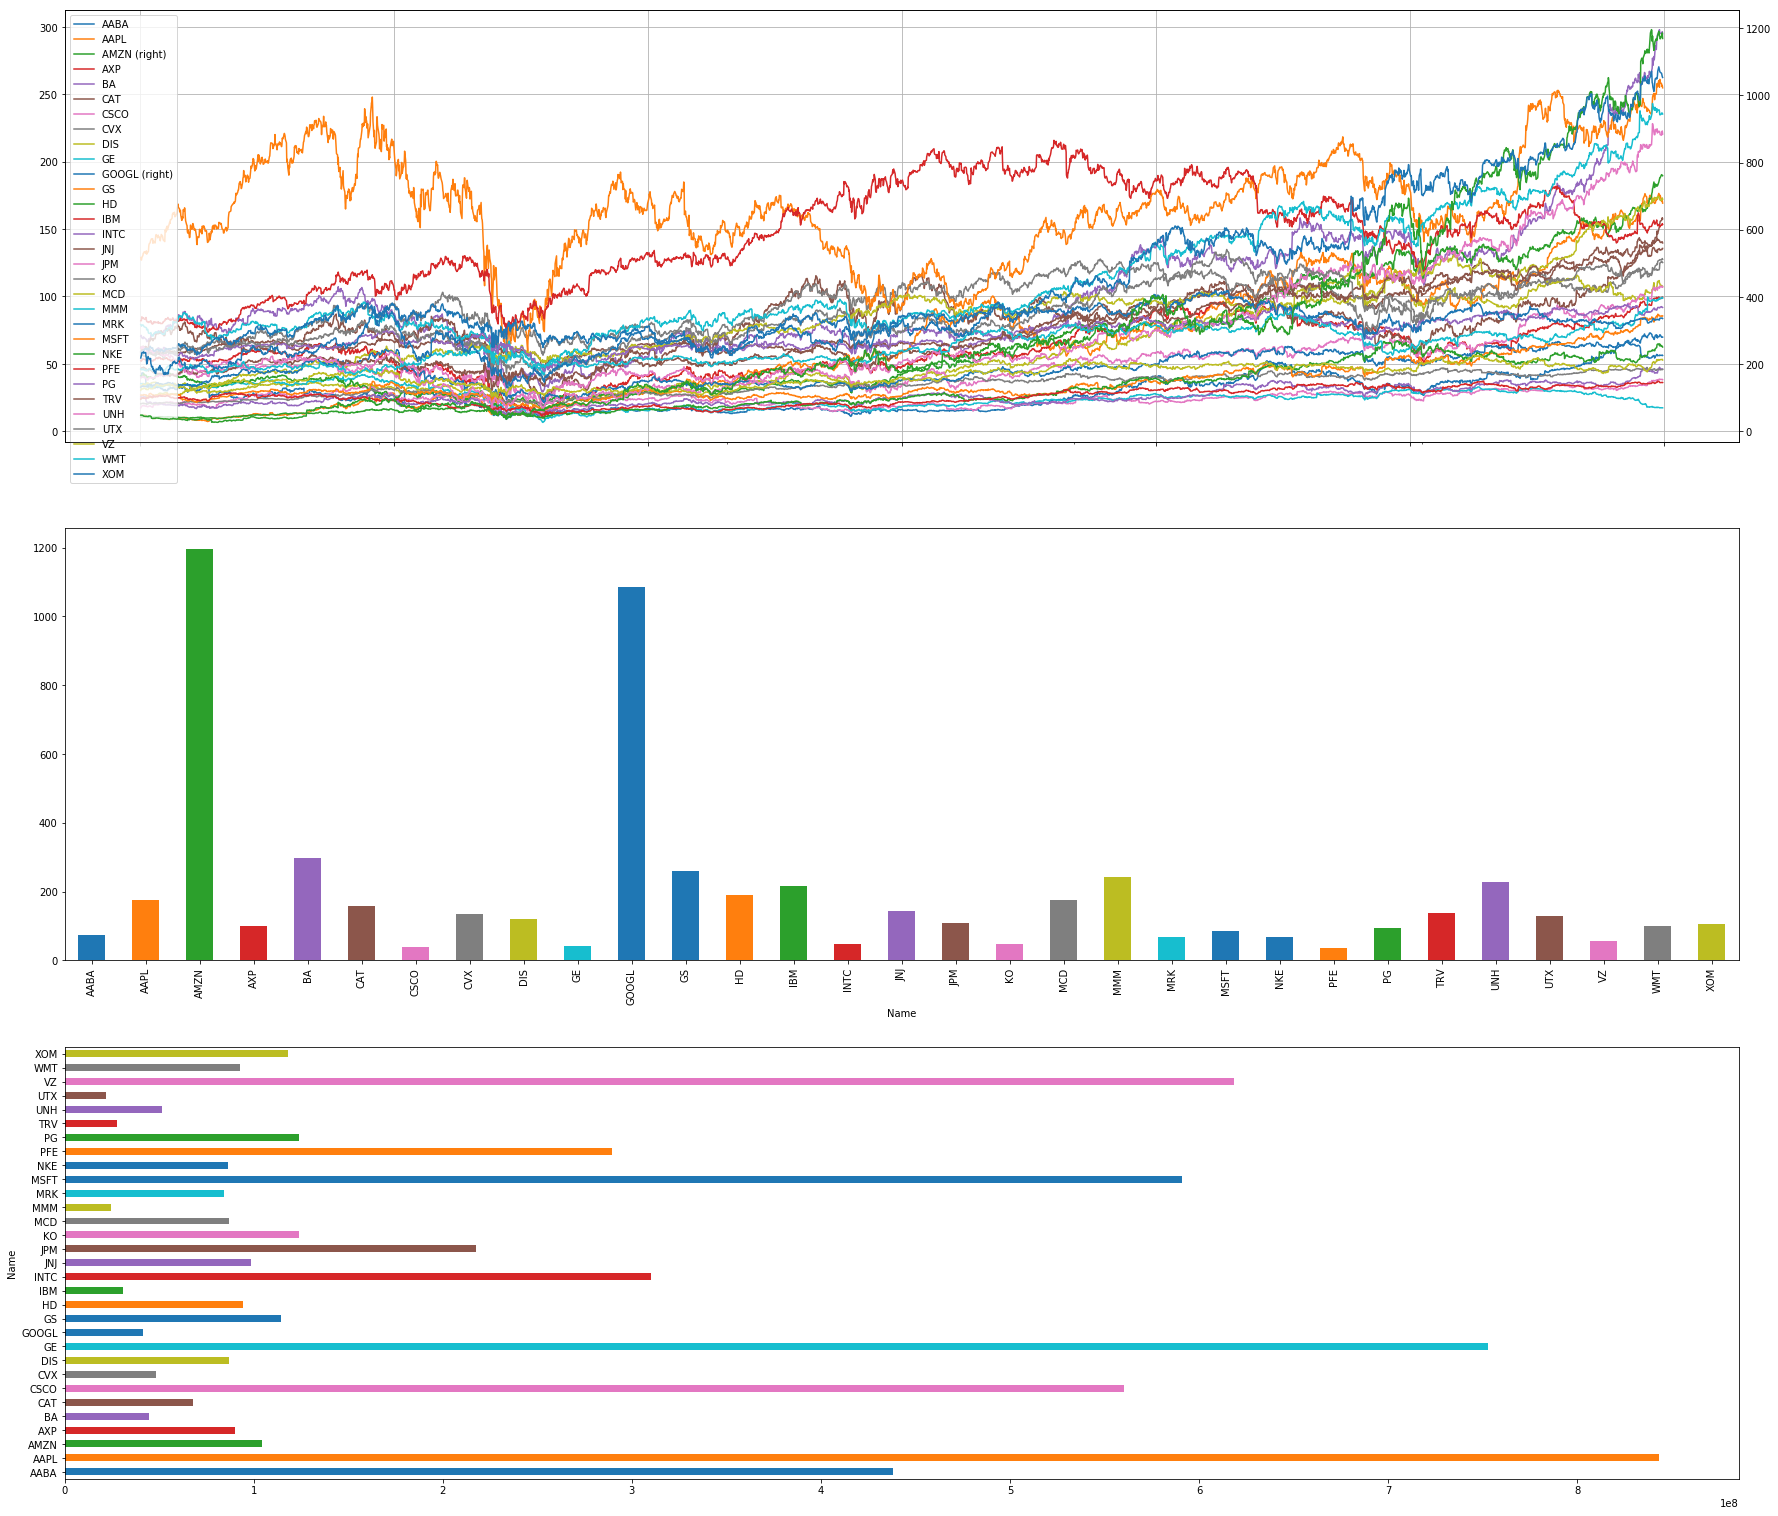

In [8]:
plt.subplot(3,1,1)
total.groupby('Name')['Close'].plot(secondary_y=['AMZN','GOOGL'],grid=True,legend=True,figsize=(30,30))

plt.subplot(3,1,2)
total.groupby('Name')['Close'].max().plot(kind='bar')

plt.subplot(3,1,3)
total.groupby('Name')['Volume'].max().plot(kind='barh')

total=total.reset_index()

__This will give us three results for starting period. First for Close values for all stocks, Bar chart for close as well and also horizontal bar chart for the given period containing the Volume data.__

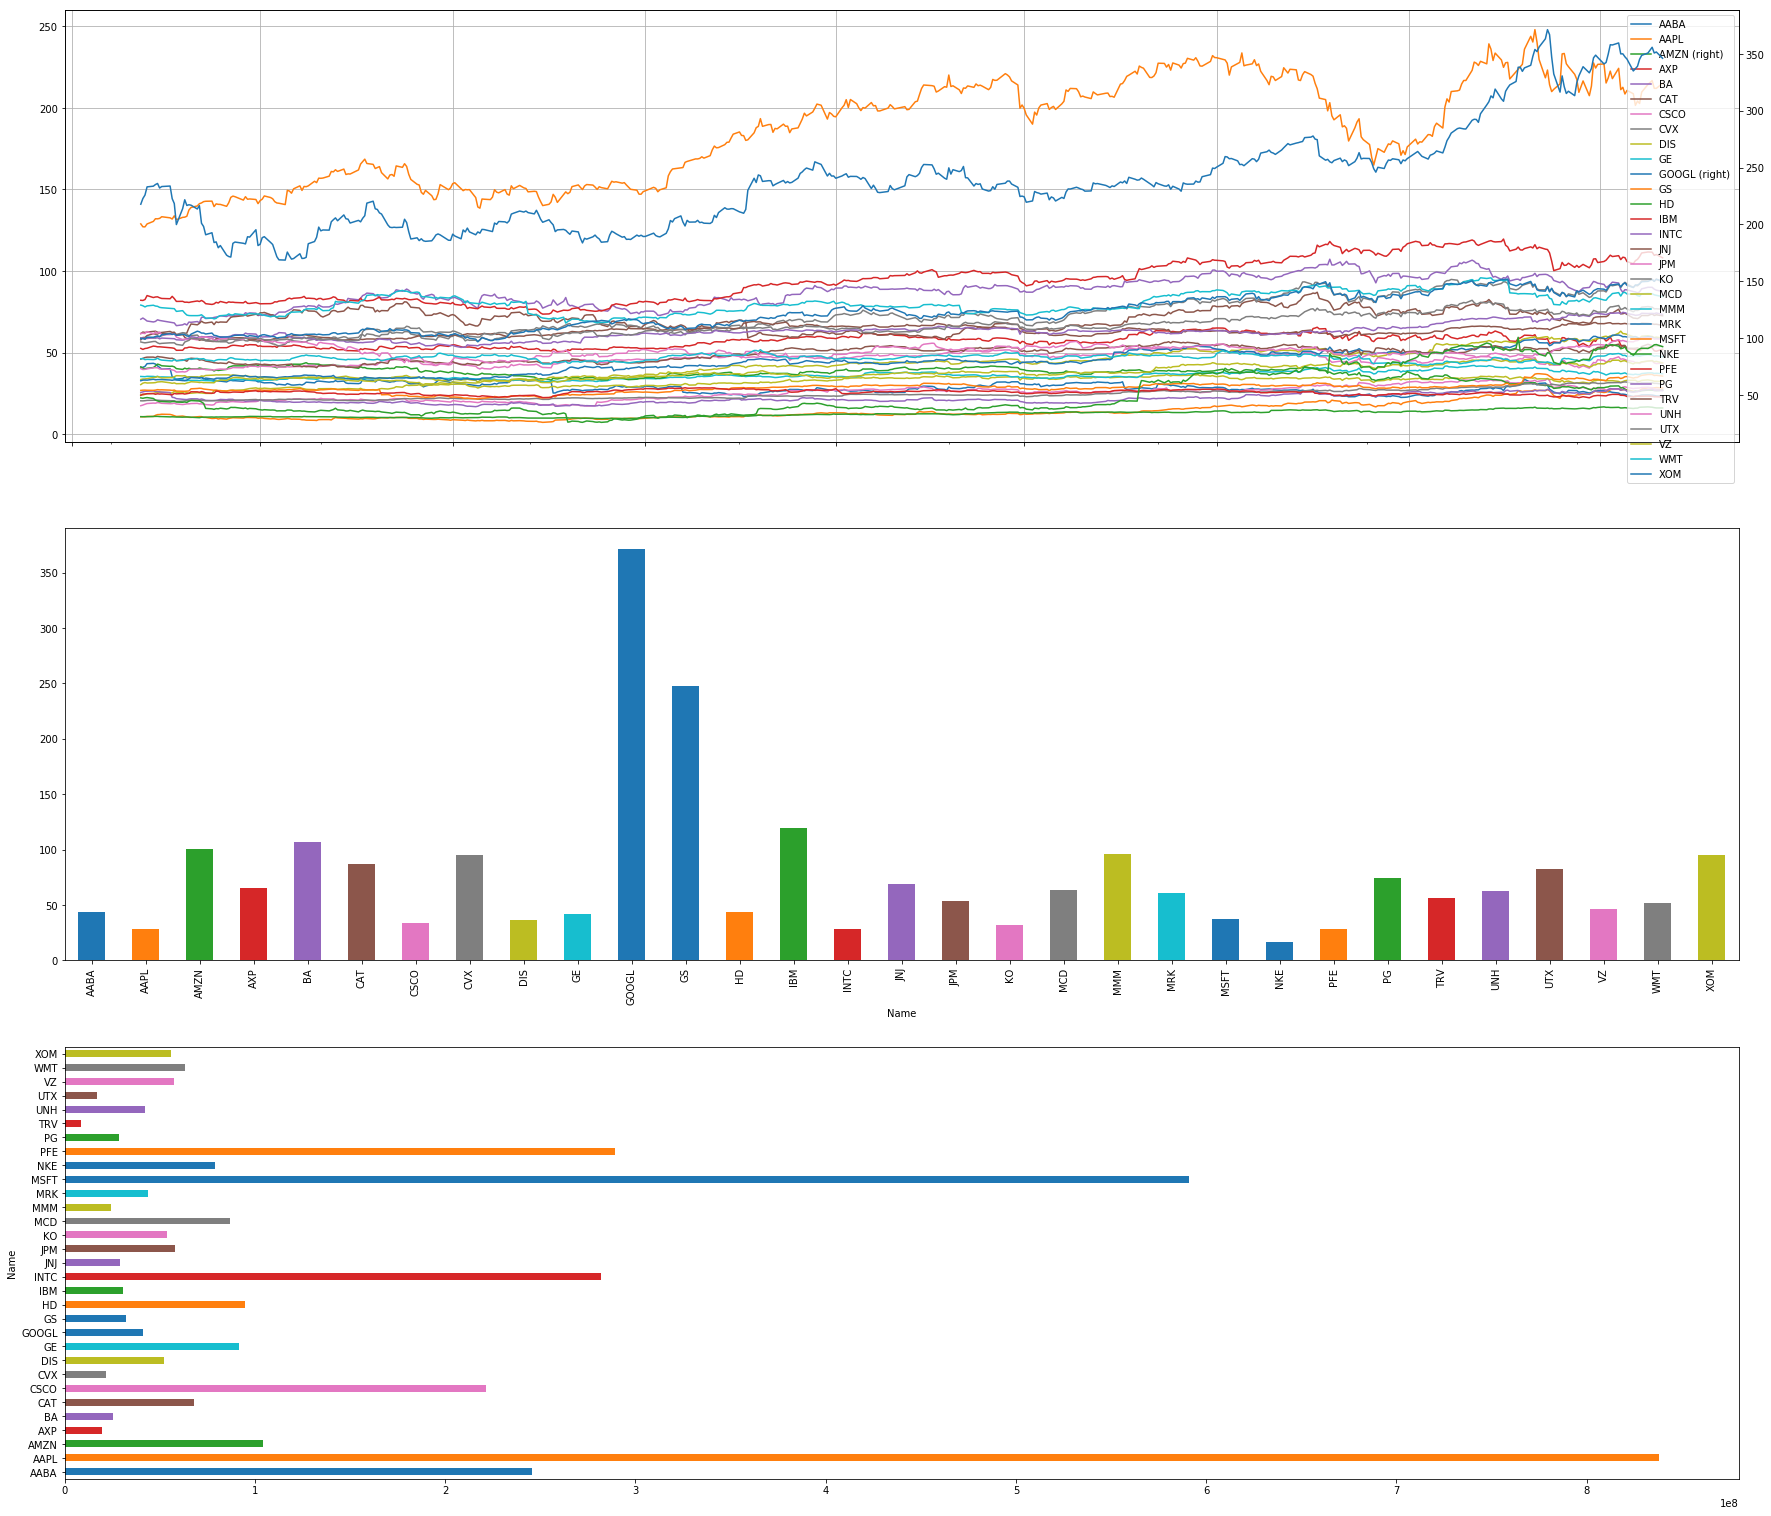

In [9]:
plt.subplot(3,1,1)
starting=total[total.Date.dt.year<=2007].set_index('Date')
starting.groupby('Name')['Close'].plot(secondary_y=['AMZN','GOOGL'],grid=True,legend=True,figsize=(30,30))

plt.subplot(3,1,2)
starting.groupby('Name')['Close'].max().plot(kind='bar')

plt.subplot(3,1,3)
x=starting.groupby('Name')['Volume'].max()
x.plot(kind='barh')

__This will give us three results for recession period. First for Close values for all stocks, Bar chart for close as well and also horizontal bar chart for the given period containing the Volume data.__ 

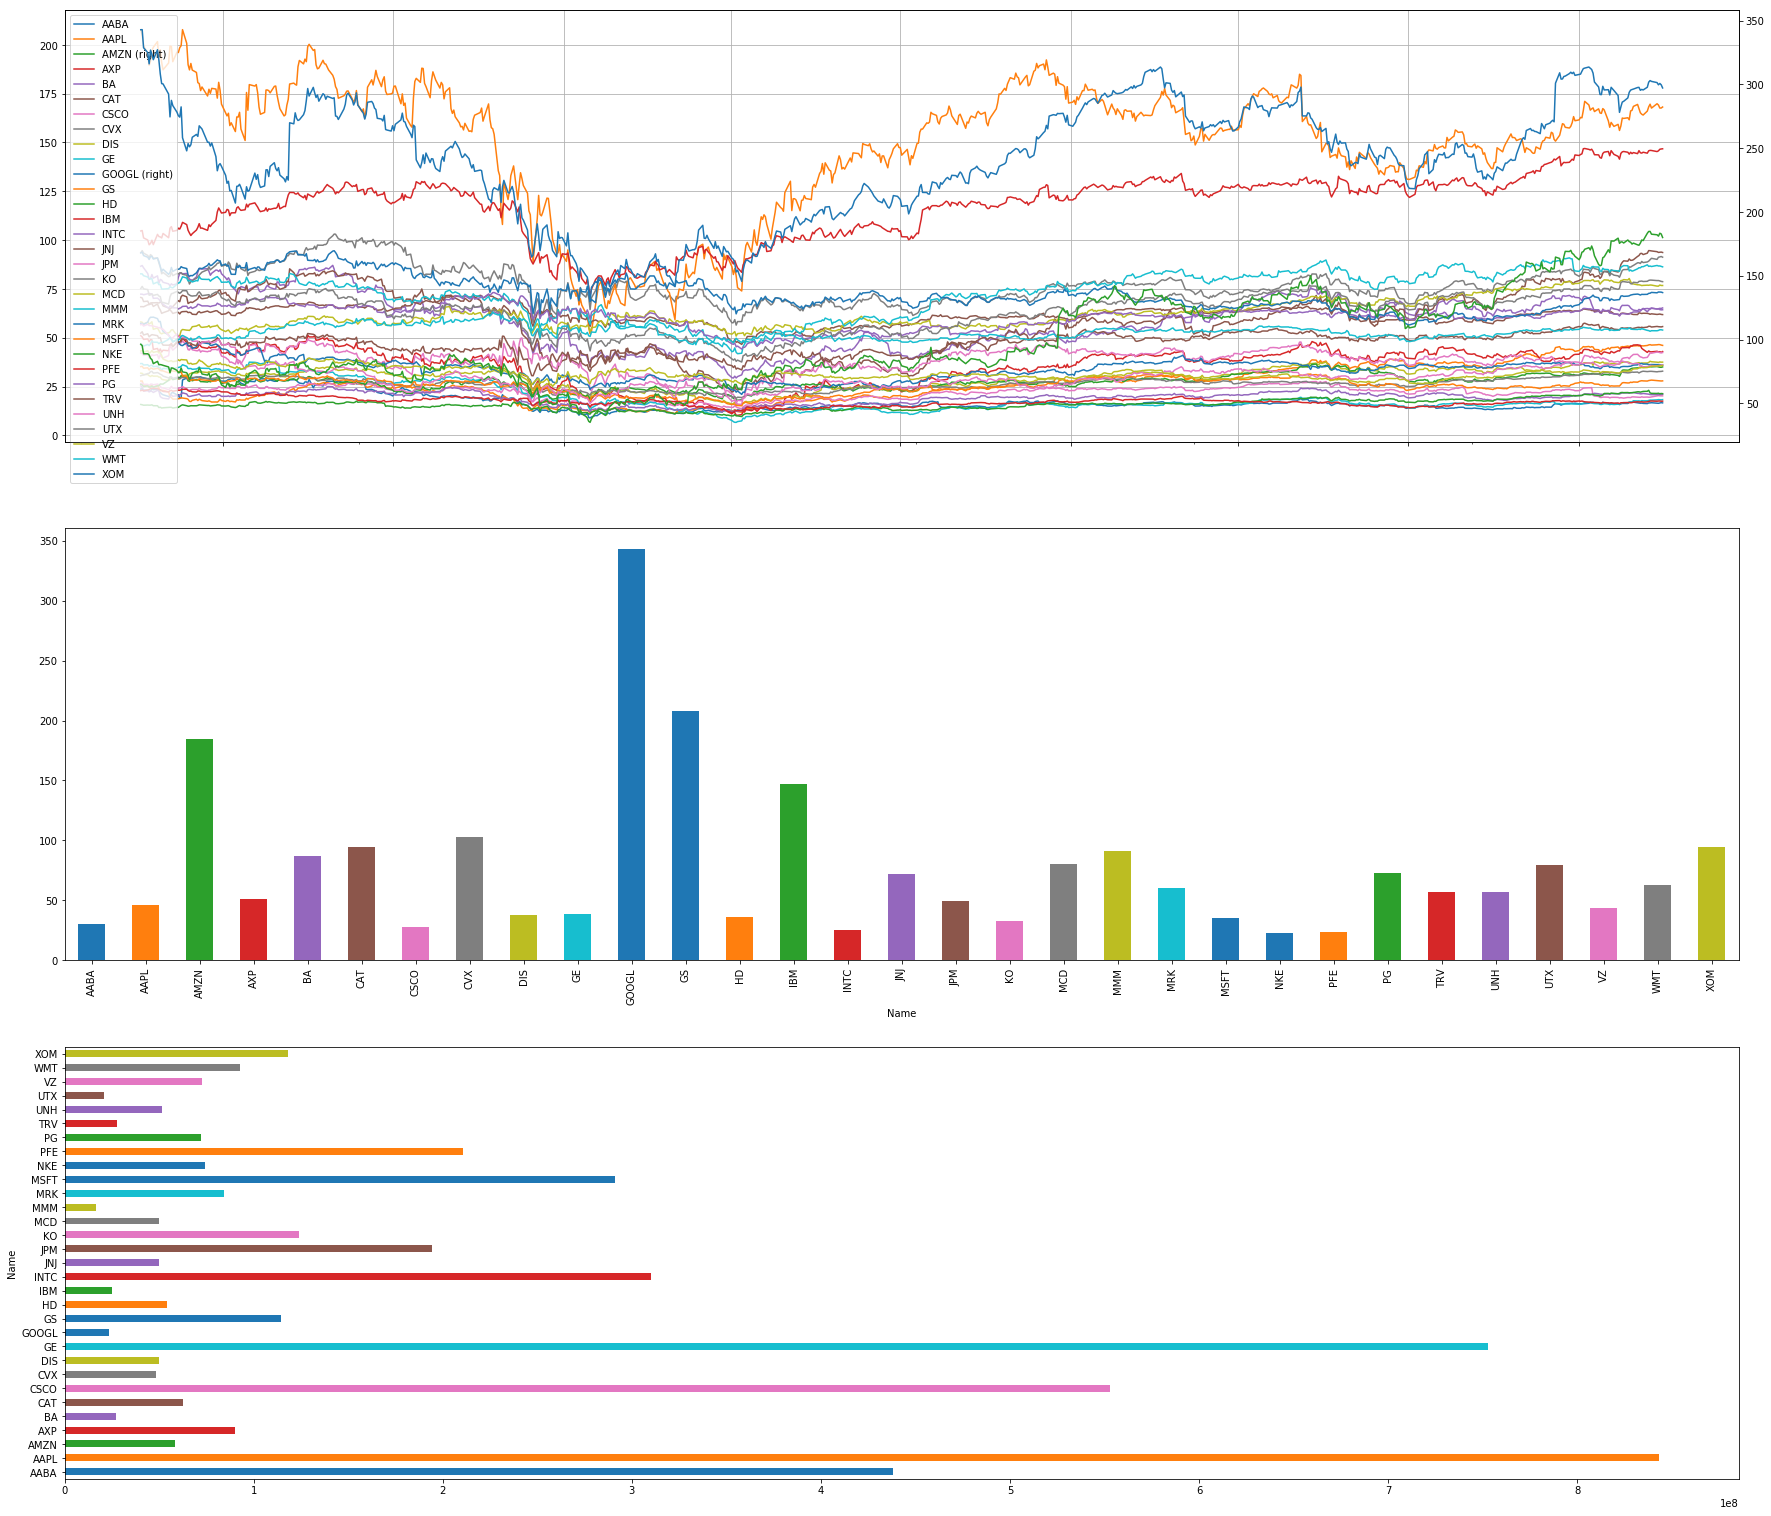

In [10]:
plt.subplot(3,1,1)
recession=total[(total.Date.dt.year>2007)&(total.Date.dt.year<=2010)].set_index('Date')
recession.groupby('Name')['Close'].plot(secondary_y=['AMZN','GOOGL'],grid=True,legend=True,figsize=(30,30))

plt.subplot(3,1,2)
recession.groupby('Name')['Close'].max().plot(kind='bar')

plt.subplot(3,1,3)
x=recession.groupby('Name')['Volume'].max()
x.plot(kind='barh')

__This will give us three results for after recession period. First for Close values for all stocks, Bar chart for close as well and also horizontal bar chart for the given period containing the Volume data.__

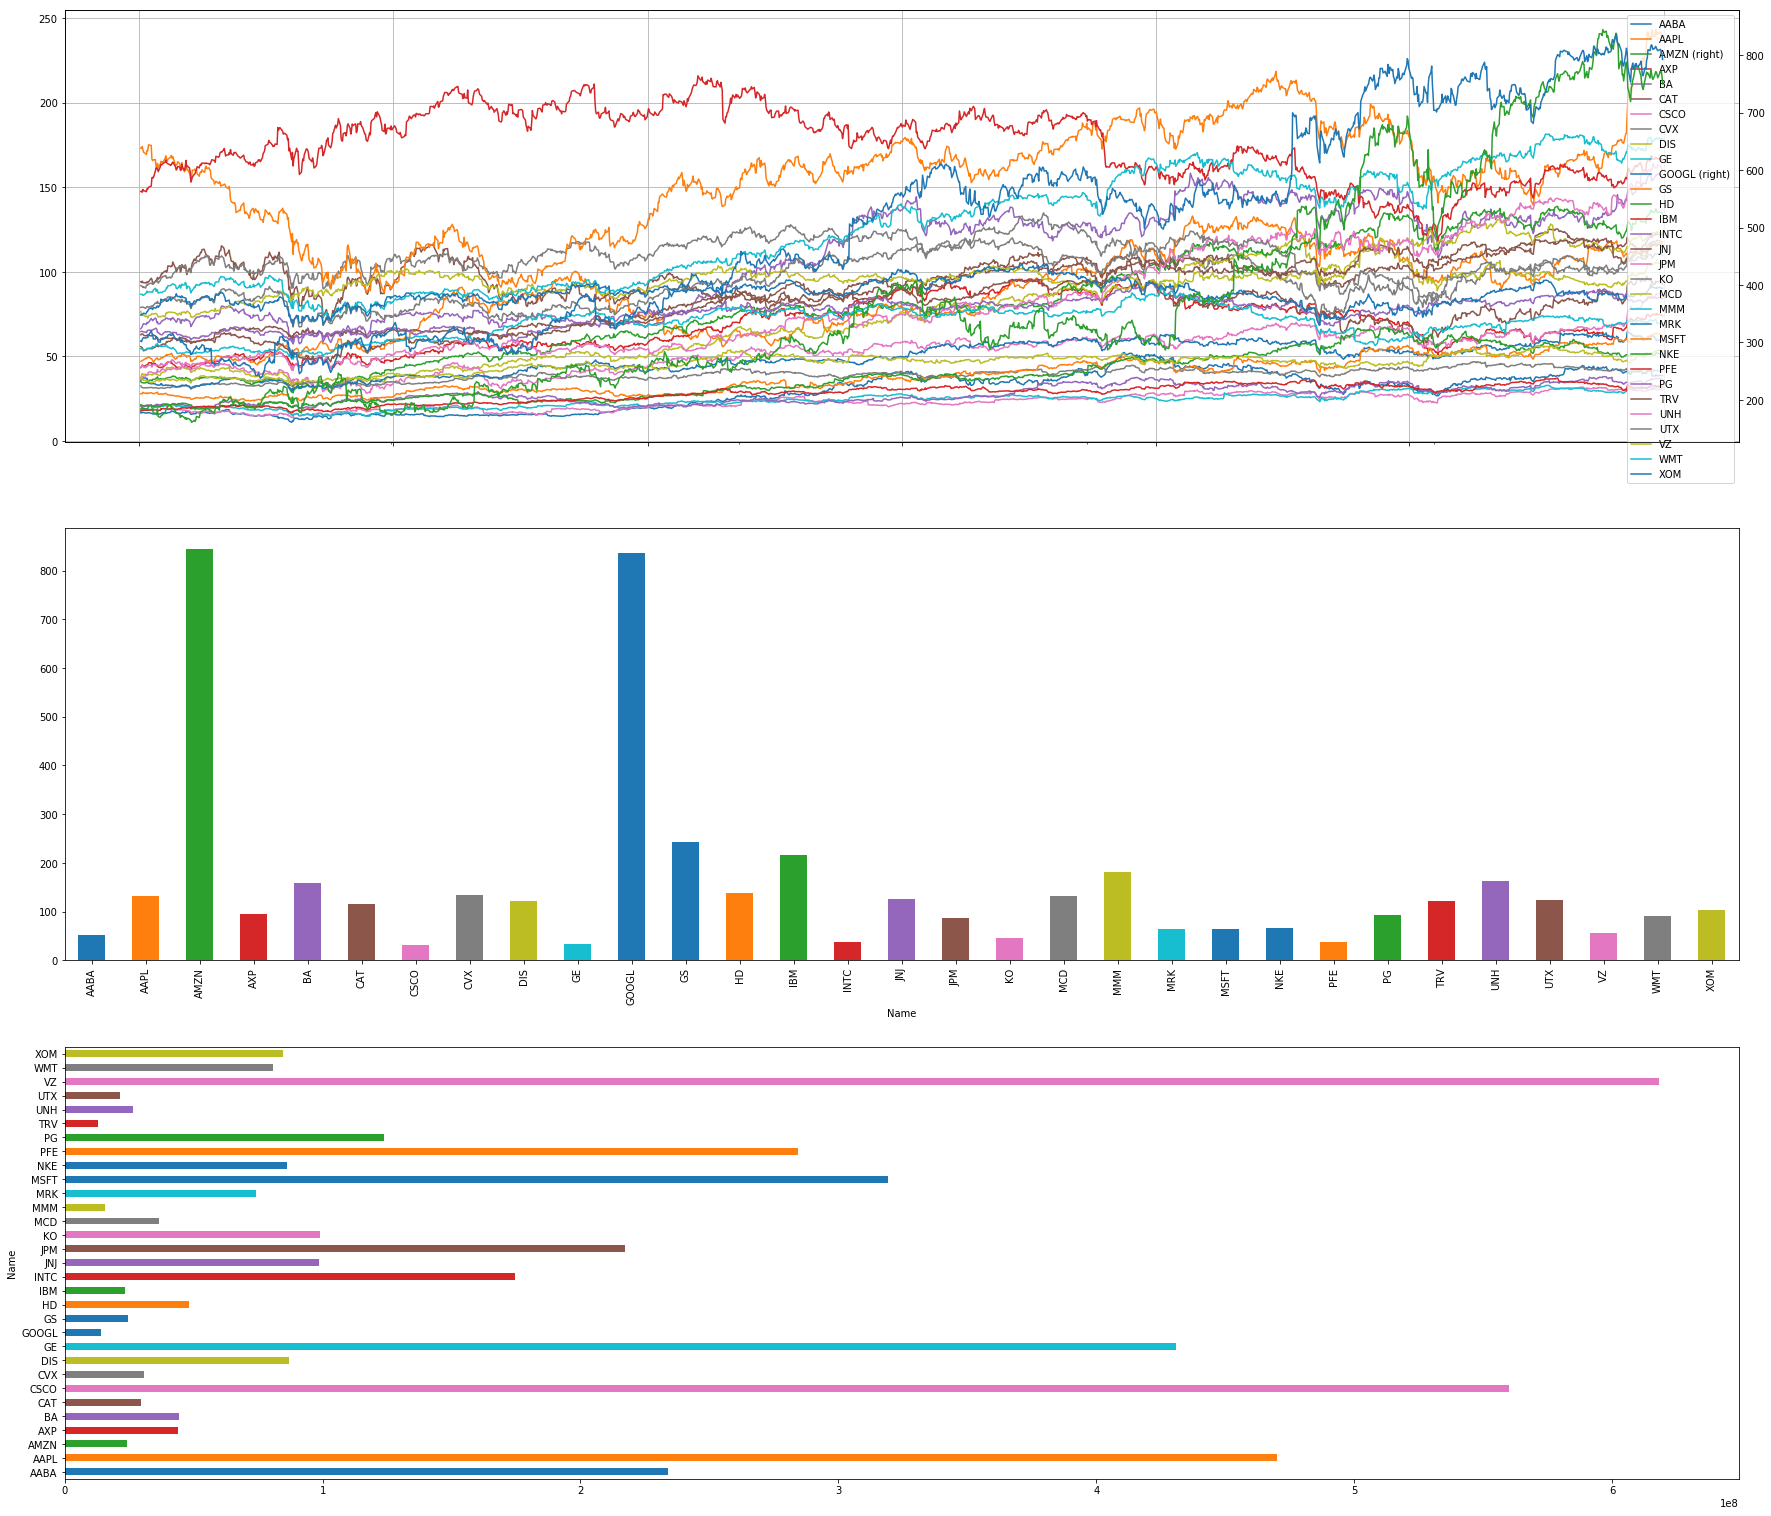

In [11]:
plt.subplot(3,1,1)
after_recession=total[(total.Date.dt.year>2010)&(total.Date.dt.year<=2016)].set_index('Date')
after_recession.groupby('Name')['Close'].plot(secondary_y=['AMZN','GOOGL'],grid=True,legend=True,figsize=(30,30))

plt.subplot(3,1,2)
after_recession.groupby('Name')['Close'].max().plot(kind='bar')

plt.subplot(3,1,3)
x=after_recession.groupby('Name')['Volume'].max()
x.plot(kind='barh')

__This will give us three results for current period. First for Close values for all stocks, Bar chart for close as well and also horizontal bar chart for the given period containing the Volume data.__

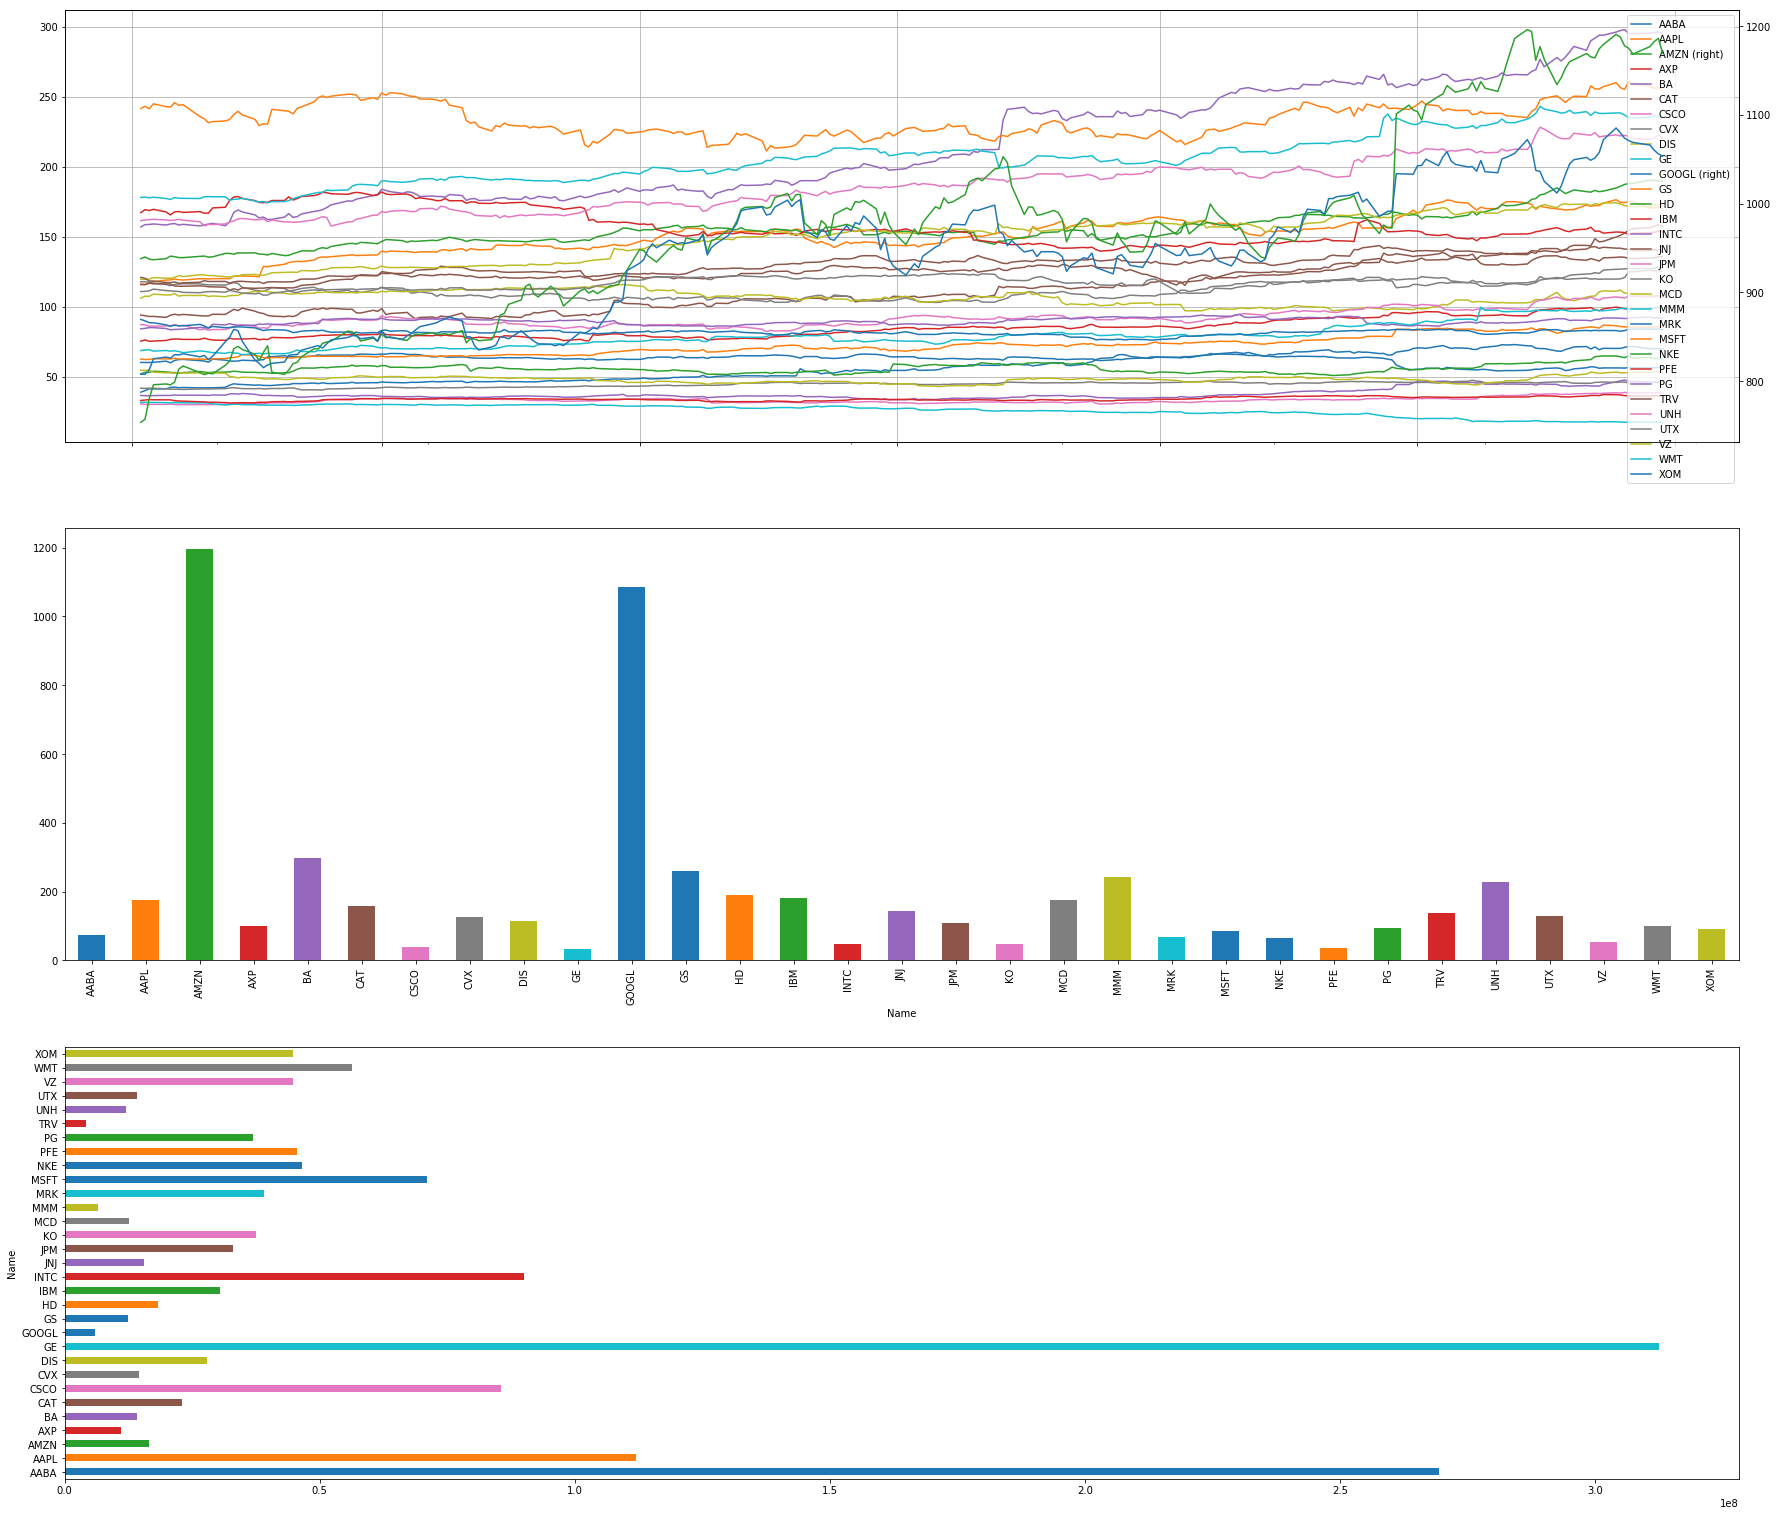

In [12]:
plt.subplot(3,1,1)
current=total[(total.Date.dt.year>2016)].set_index('Date')
current.groupby('Name')['Close'].plot(secondary_y=['AMZN','GOOGL'],grid=True,legend=True,figsize=(30,30))

plt.subplot(3,1,2)
current.groupby('Name')['Close'].max().plot(kind='bar')

plt.subplot(3,1,3)
x=current.groupby('Name')['Volume'].max()
x.plot(kind='barh')

# Answer 3

__Report:__

For this question I am going to take two stocks GOOGL(google) and AAPL(apple) for analyis.I am going to make a new dataframe which will contain ticker symbol as column index and close value for column values with date as index. I am going to plot the graphs for above using matplotlib library and then I am looking forward to finding the returns for the above stock then comapre them;
Formula for return can be given by current price devided by starting price. I am also looking forward to transforming data using the moving average,for that I will use rolling method of pandas library.Then I am going to get the change of stock prices for both the stocks for every day and plot it.

The above analysis will be useful for comparing which stock is better for purchase and which stock will give you better return. by using moving average we can somewhat will be able to predict the future tock price.

In [13]:
GOOGL.info()
print(GOOGL.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB
               Open         High          Low        Close        Volume  \
count   3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean     428.200802   431.835618   424.130275   428.044001  3.551504e+06   
std      236.320026   237.514087   234.923747   236.343238  3.038599e+06   
min      131.390000   134.820000   123.770000   128.850000  5.211410e+05   
25%      247.77

__The below code will give us the graphs for different columns against time for GOOGL.__

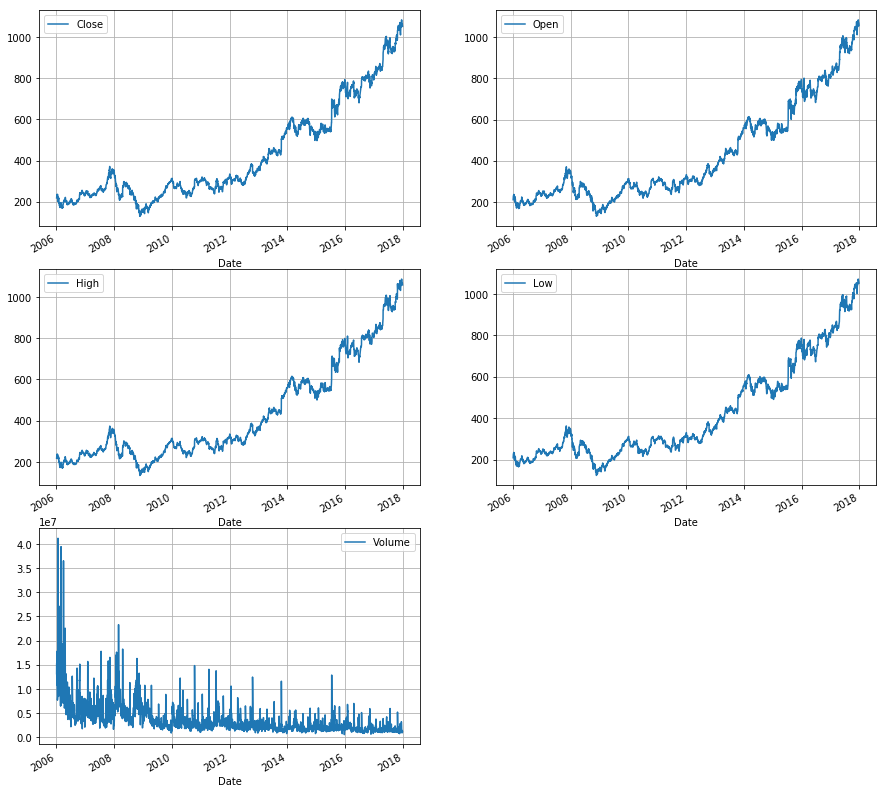

In [14]:
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
GOOGL.Close.plot(grid=True,legend=True)

plt.subplot(3,2,2)
GOOGL.Open.plot(grid=True,legend=True)
plt.subplot(3,2,3)
GOOGL.High.plot(grid=True,legend=True)
plt.subplot(3,2,4)
GOOGL.Low.plot(grid=True,legend=True)
plt.subplot(3,2,5)
GOOGL.Volume.plot(grid=True,legend=True)

plt.show()

__The below snippet will give us the return for GOOGL stock with top 5 maximum return values and graph for all the values until now.__

Date
2017-12-18    3.981362
2017-12-19    3.956985
2017-12-20    3.928430
2017-11-27    3.921315
2017-12-15    3.921269
Name: Close, dtype: float64

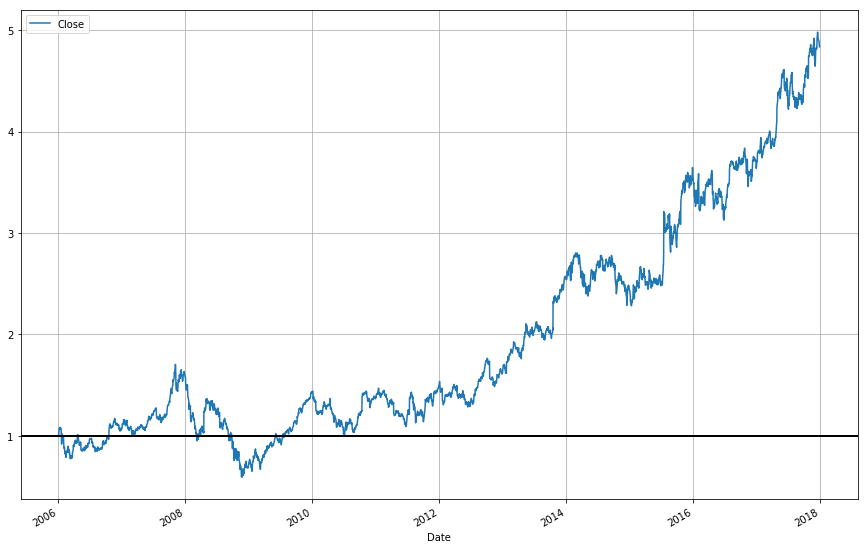

In [15]:
GOOGL_return=GOOGL.groupby('Name')['Close'].apply(lambda x:x/x[0])
GOOGL_return.plot(grid=True,legend=True,figsize=(15,10)).axhline(y = 1, color = "black", lw = 2)
GOOGL_return.sort_values(ascending=False).head()-1

__The below snippet will give us the moving average for GOOGL stock with last five values.__

Date
2017-12-22    1039.0
2017-12-26    1040.0
2017-12-27    1041.0
2017-12-28    1042.0
2017-12-29    1043.0
Name: Close, dtype: float64

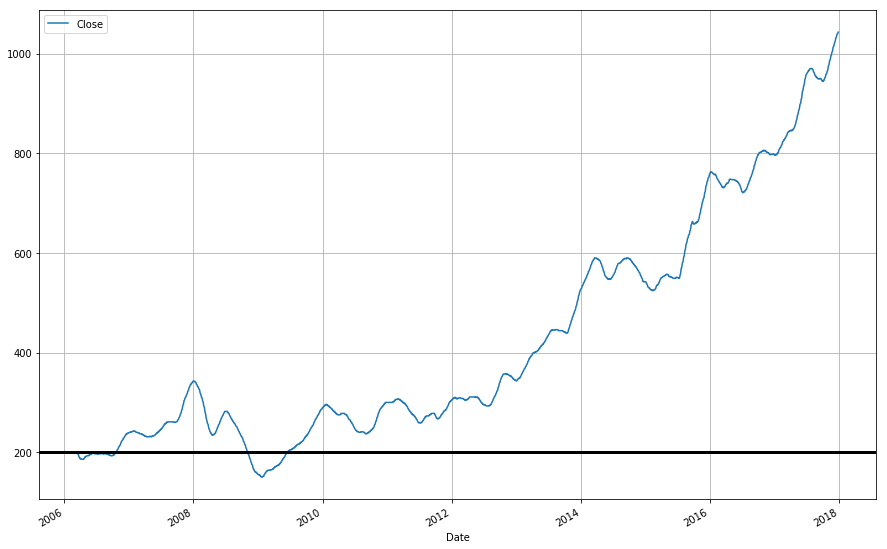

In [16]:
GOOGL_rolling=np.round(GOOGL['Close'].rolling(window=50).mean())
GOOGL_rolling.plot(grid=True,legend=True,figsize=(15,10)).axhline(y=200,color='black',lw=3)
GOOGL_rolling.tail()

__Making a new dataframe as GOOGL and AAPL as column head and thier close values as a column values.__

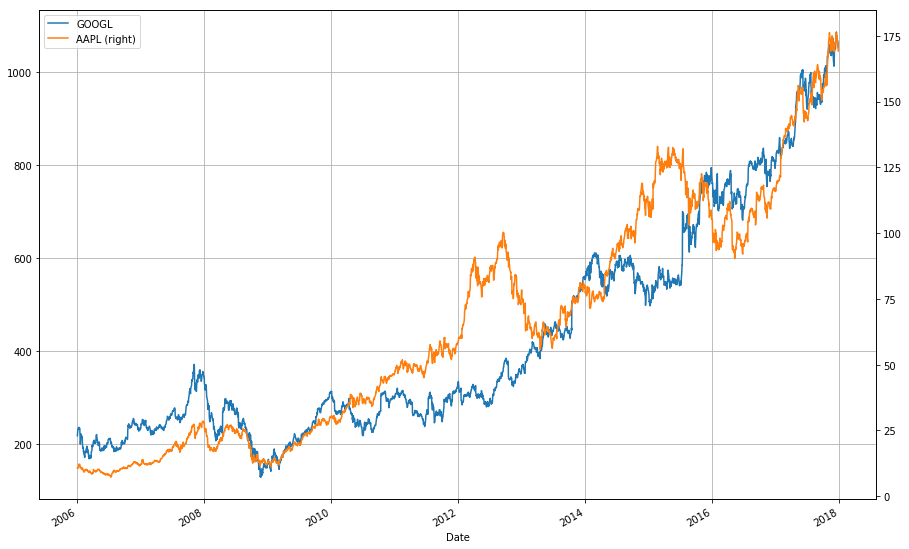

In [17]:
df=pd.DataFrame({'GOOGL':GOOGL.Close,'AAPL':AAPL.Close })
df.plot(secondary_y = ["AAPL"], grid = True,figsize=(15,10))

__Finding the moving average for both the stocks and comparin them using the graph__

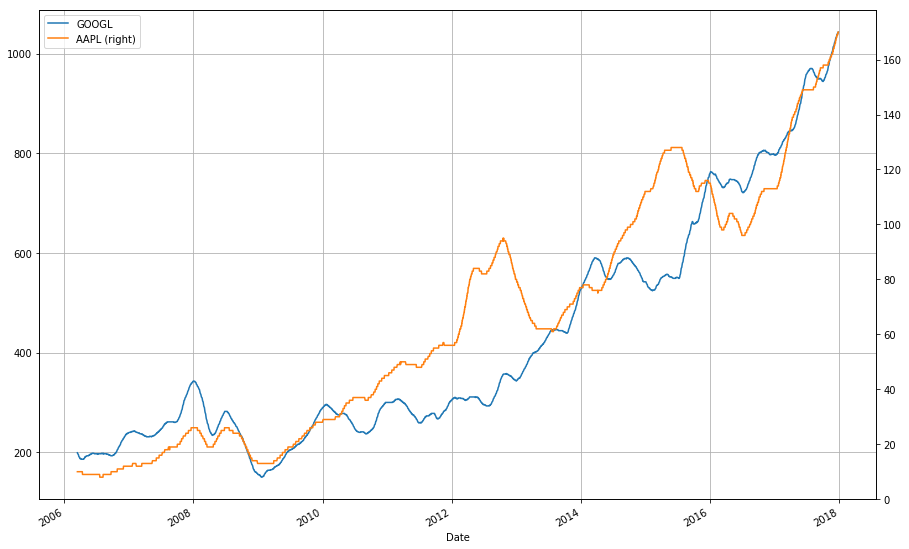

In [18]:
df_rolling=np.round(df.rolling(window=50).mean())
df_rolling.plot(secondary_y = ["AAPL"], grid = True,figsize=(15,10))

__finding the return values for both the stacks and comparing their values using graph.__

               GOOGL      AAPL
Date                          
2006-01-03  0.000000  0.000000
2006-01-04  0.023000  0.002809
2006-01-05  0.036818 -0.004682
2006-01-06  0.069917  0.020599
2006-01-09  0.072763  0.016854


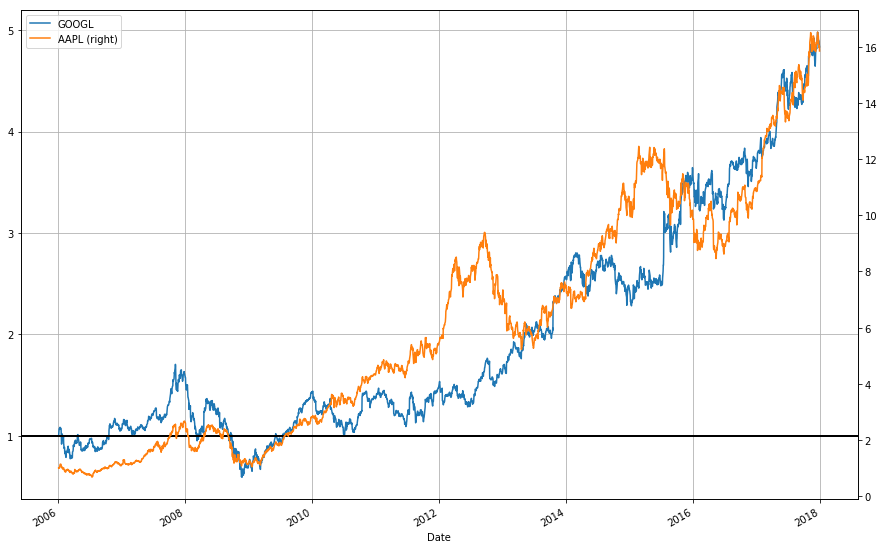

In [19]:
df_return=df.apply(lambda x: x / x[0])
print(df_return.head()-1)
df_return.plot(secondary_y=['AAPL'],grid = True,figsize=(15,10)).axhline(y = 1, color = "black", lw = 2)

__finding the change in stock for every value and getting the result in the graph.__

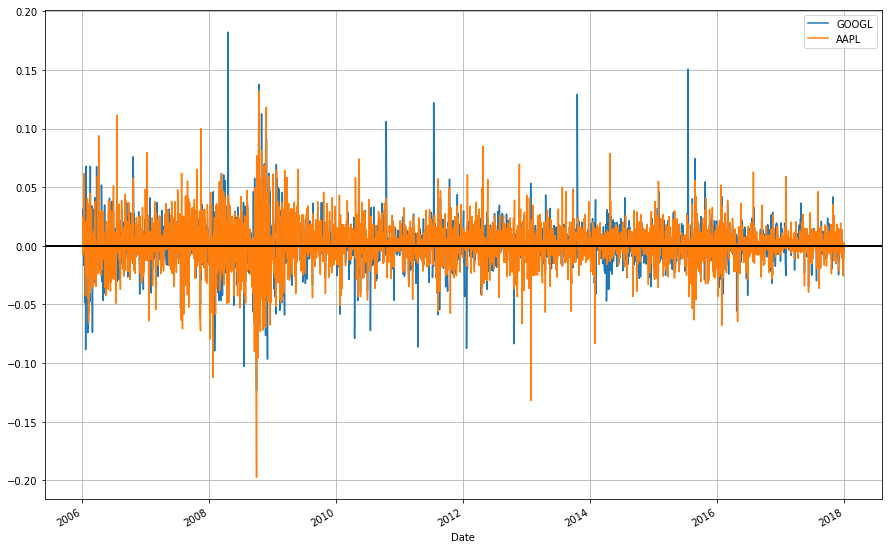

In [20]:
df.apply(lambda x: np.log(x) - np.log(x.shift(1))).plot(grid=True,figsize=(15,10)).axhline(y = 0, color = "black", lw = 2)

# Answer 4

__Report:__

For this question I am going to take stocks MMM(3M),MSFT(Microsoft),IBM,AMZN(Amazon) and AAPL(apple) for analyis.I am going to make a new dataframe which will contain ticker symbol as column index and close value for column values with date as index. I am going to plot the graphs for above using matplotlib library and then I am looking forward to finding the returns for the above stocks and then compare them;I am goig to use same methods to compare the stocks as I did in Question 3.

The above analysis will be useful for comparing which stock is better for purchase and which stock will give you better return.

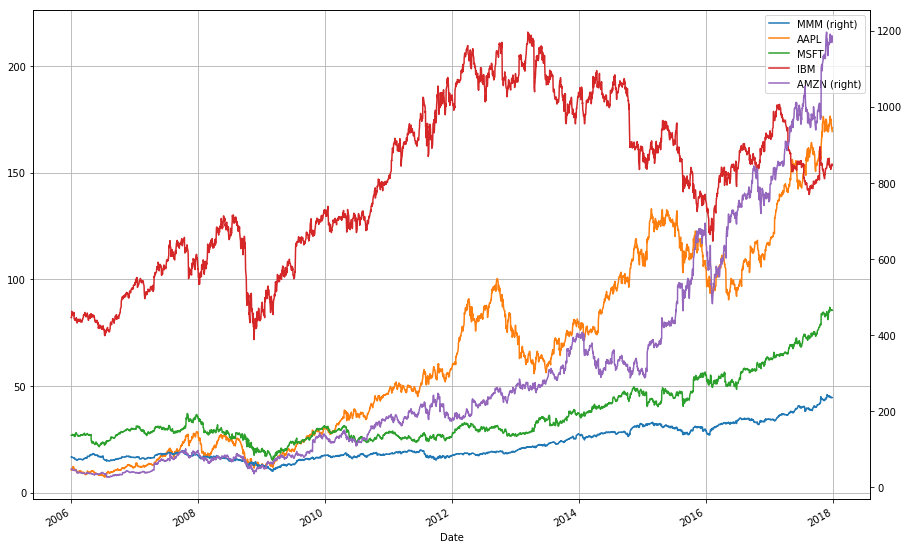

In [21]:
df2=pd.DataFrame({'MMM':MMM.Close,'AAPL':AAPL.Close,'MSFT':MSFT.Close,'IBM':IBM.Close,'AMZN':AMZN.Close })
df2.plot(secondary_y=['MMM','AMZN'],grid=True,figsize=(15,10))

__finding the change in stocks in comparison of each other for all five stocks.__

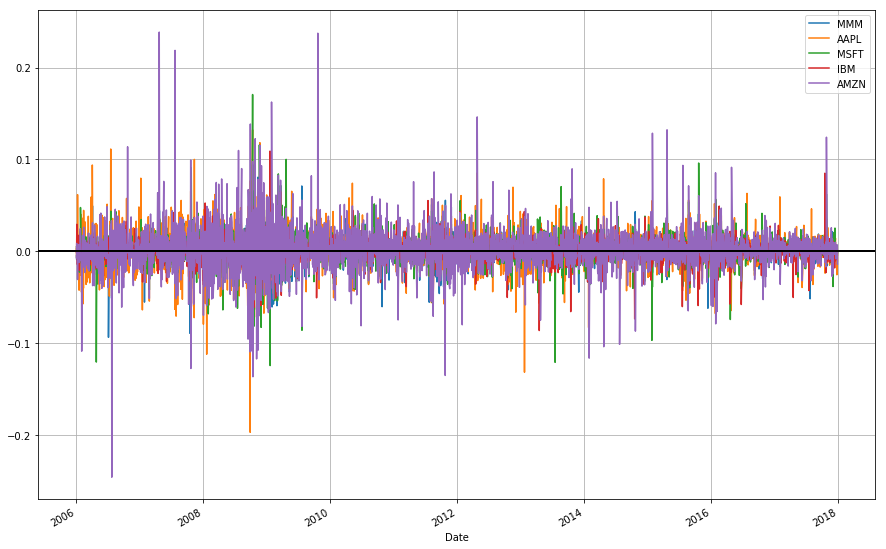

In [22]:
df2.apply(lambda x: np.log(x) - np.log(x.shift(1))).plot(grid=True,figsize=(15,10)).axhline(y = 0, color = "black", lw = 2)

__Finding the return for all the values for all the stocks and getting the graph to compare them.__

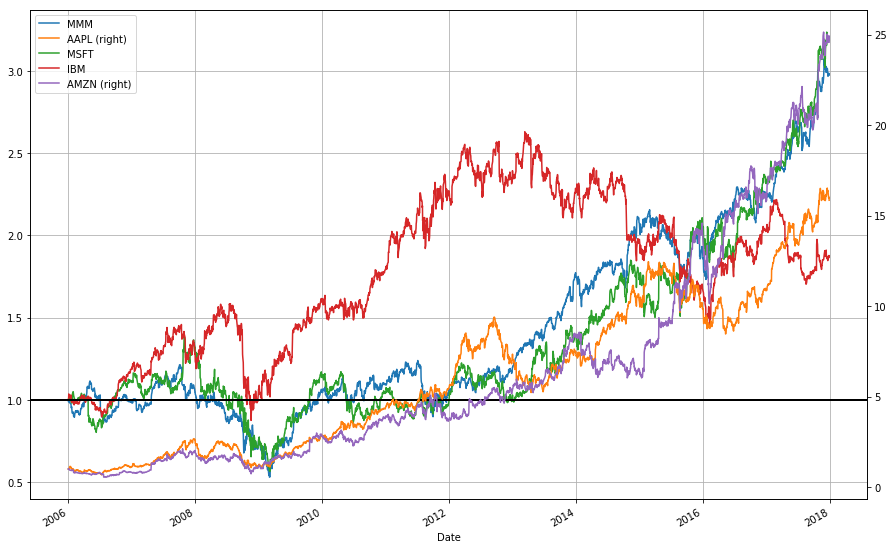

In [23]:
return_val=df2.apply(lambda x: x / x[0])
return_val.plot(secondary_y=['AMZN','AAPL'],grid = True,figsize=(15,10)).axhline(y = 1, color = "black", lw = 2)

__Finding the moving average for every column and comparing the result for all the values of stock.__

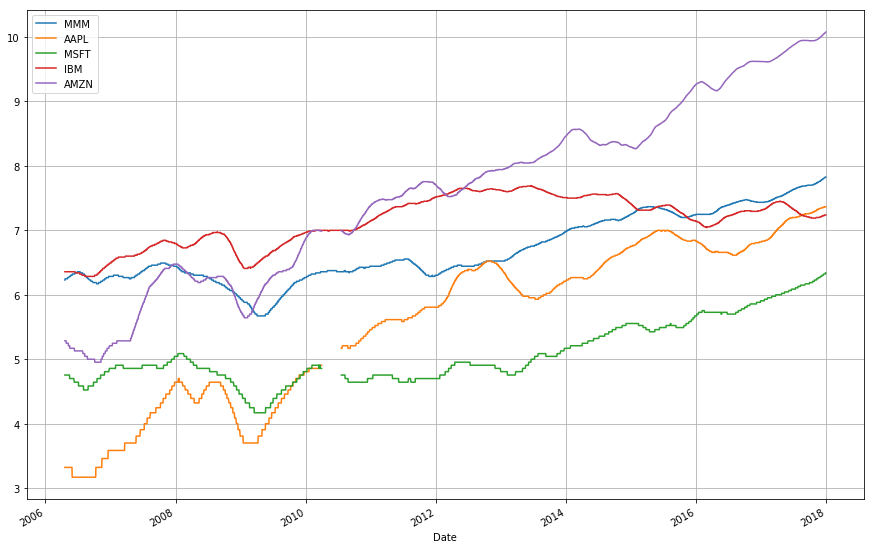

In [24]:
df2_rolling=np.round(df2.rolling(window=75).mean())
df2_rolling.apply(lambda x: np.log2(x)).plot(grid = True,figsize=(15,10))